In [ ]:
#Install Package to run-Prep
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install Package
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Load filtered tree dataset (tree data near columbia university)
trees = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/near_columbia_trees.geojson"
)
# Check the structure
trees.head()

,nta,horz_grate,sidw_crack,zipcode,soil_lvl,inf_outlet,latitude,nta_name,state,inf_canopy,...,address,horz_plant,inf_wires,borocode,horz_blck,vert_pgrd,tree_dbh,inf_paving,inf_shoes,geometry
0,MN11,No,No,10026,Level,No,40.8021560301,Central Harlem South,New York,No,...,2079 FRED DOUGLASS BOULEVARD,No,No,1,Yes,No,7,No,No,POINT (-73.95703 40.80216)
1,MN11,No,No,10026,Above,No,40.8021560301,Central Harlem South,New York,No,...,2079 FRED DOUGLASS BOULEVARD,Yes,No,1,Yes,No,7,No,No,POINT (-73.95703 40.80216)
2,MN11,No,No,10026,Above,No,40.8022253136,Central Harlem South,New York,No,...,280 MANHATTAN AVENUE,No,No,1,Yes,No,11,No,No,POINT (-73.95886 40.80223)
3,MN11,No,No,10026,Above,No,40.8027082622,Central Harlem South,New York,No,...,294 MANHATTAN AVENUE,No,No,1,No,No,18,No,No,POINT (-73.95851 40.80271)
4,MN11,No,No,10026,Level,No,40.802859185,Central Harlem South,New York,No,...,300 MANHATTAN AVENUE,No,No,1,No,No,27,No,No,POINT (-73.95841 40.80286)


In [ ]:
# Load my daily route geojson file
Sara_map = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/Columbia Daily Route.geojson"
)

# Preview your data
Sara_map.head()

,Name,Type,name,Type,type,stroke,stroke-width,stroke-opacity,geometry
0,Way to School,None,None,Path,None,None,NaN,NaN,"LINESTRING (-73.96146 40.80432, -73.96142 40.8..."
1,None,None,None,None,None,None,NaN,NaN,"LINESTRING (-73.96107 40.80833, -73.96203 40.8..."
2,Niko Coffee,None,None,Cafe,None,None,NaN,NaN,POINT (-73.96243 40.80528)
3,Blue Bottle,Coffee,None,None,None,None,NaN,NaN,POINT (-73.96549 40.8063)
4,Nous Espresso,Coffee,None,None,None,None,NaN,NaN,POINT (-73.96088 40.80752)


In [5]:
# Reproject both to WGS84 (EPSG:4326) to ensure compatibility
trees = trees.to_crs(epsg=4326)
Sara_map = Sara_map.to_crs(epsg=4326)

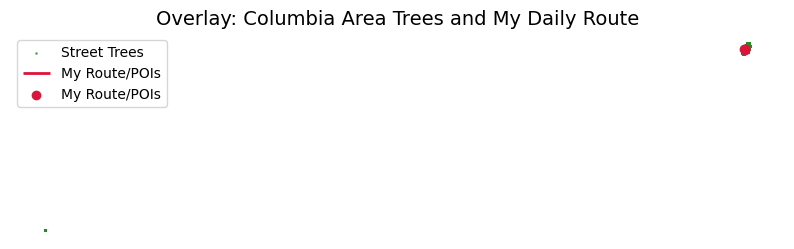

In [ ]:
# Visualizing the Overlay
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the trees in green
trees.plot(ax=ax, color="forestgreen", markersize=1, alpha=0.6, label="Street Trees")

# Plot your custom route or points in red
Sara_map.plot(ax=ax, color="crimson", linewidth=2, markersize=25, label="My Route/POIs")

# Add title and legend
ax.set_title("Overlay: Columbia Area Trees and My Daily Route", fontsize=14)
ax.legend()
ax.set_axis_off()
plt.show()

The Previous Result looks super weird so I work on finding the error
And the problem looks like its from the street tree data set

In [ ]:
# Debug-Step 0-Import Library
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Debug-Step 1-Load the original NYC street tree census geojson
gdf = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/NewYorkCity_StreetTreeCensus_2005_20250710.geojson"
)

In [ ]:
# Debug-Step 2-Clean and Convert ZIP Column
# Convert ZIP code to string and clean it
gdf["zipcode"] = gdf["zipcode"].astype(str).str.strip()

# Keep only 5-digit numeric ZIP codes
gdf = gdf[gdf["zipcode"].str.match(r"^\d{5}$", na=False)]

# Convert to integer
gdf["zipcode"] = gdf["zipcode"].astype(int)

In [ ]:
# Debug-Step 3- Filter Columbia ZIP codes
columbia_zips = [10025, 10026, 10027, 10030, 10031]
near_columbia_gdf = gdf[gdf["zipcode"].isin(columbia_zips)]

In [ ]:
# Debug-Step 4
# Remove invalid or far-off geometries
# Remove rows with missing or empty geometry
near_columbia_gdf = near_columbia_gdf[
    near_columbia_gdf.geometry.notna() & ~near_columbia_gdf.geometry.is_empty
]

# Filter to only NYC-bound data points
bbox = (-74.05, 40.5, -73.85, 40.95)
near_columbia_gdf = near_columbia_gdf[
    near_columbia_gdf.geometry.bounds["minx"].between(bbox[0], bbox[2])
    & near_columbia_gdf.geometry.bounds["maxx"].between(bbox[0], bbox[2])
    & near_columbia_gdf.geometry.bounds["miny"].between(bbox[1], bbox[3])
    & near_columbia_gdf.geometry.bounds["maxy"].between(bbox[1], bbox[3])
]

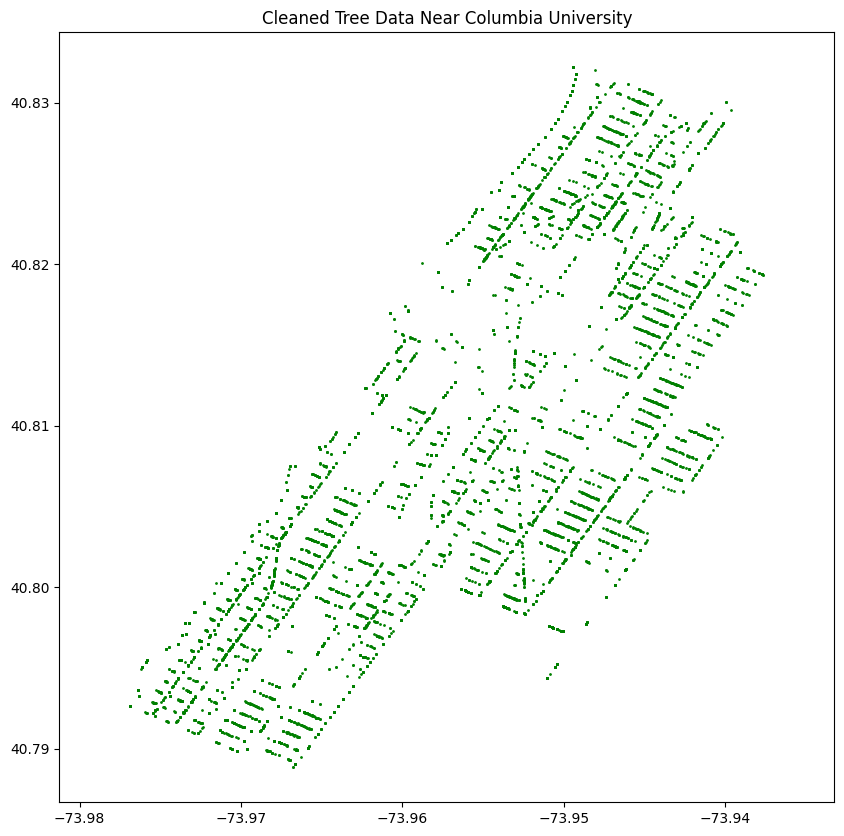

In [ ]:
# Debug-Step 5- Plot
near_columbia_gdf.plot(figsize=(10, 10), color="green", markersize=1)
plt.title("Cleaned Tree Data Near Columbia University")
plt.axis("equal")
plt.show()

Staring From here everthing looks fine now, so I re-start to overlay two map (Street tree and my daily route)

In [19]:
# Load my daily route geojson file
Sara_map = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/Columbia Daily Route.geojson"
)

# Preview your data
Sara_map.head()

,Name,Type,name,Type,type,stroke,stroke-width,stroke-opacity,geometry
0,Way to School,None,None,Path,None,None,NaN,NaN,"LINESTRING (-73.96146 40.80432, -73.96142 40.8..."
1,None,None,None,None,None,None,NaN,NaN,"LINESTRING (-73.96107 40.80833, -73.96203 40.8..."
2,Niko Coffee,None,None,Cafe,None,None,NaN,NaN,POINT (-73.96243 40.80528)
3,Blue Bottle,Coffee,None,None,None,None,NaN,NaN,POINT (-73.96549 40.8063)
4,Nous Espresso,Coffee,None,None,None,None,NaN,NaN,POINT (-73.96088 40.80752)


In [20]:
Sara_map = Sara_map.to_crs(epsg=4326)
near_columbia_gdf = near_columbia_gdf.to_crs(epsg=4326)

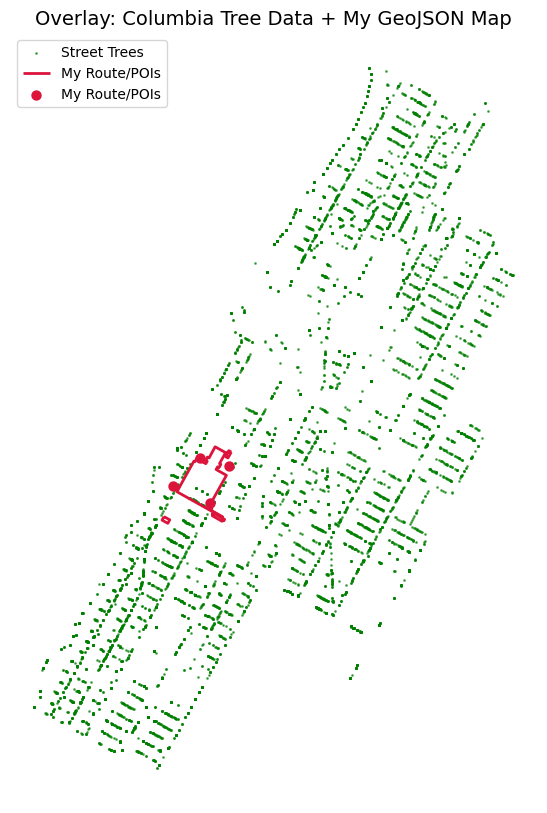

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the trees
near_columbia_gdf.plot(
    ax=ax, color="green", markersize=1, alpha=0.6, label="Street Trees"
)

# Plot your custom GeoJSON (adjust style depending on type)
Sara_map.plot(ax=ax, color="crimson", linewidth=2, markersize=30, label="My Route/POIs")

# Add legend and title
ax.set_title("Overlay: Columbia Tree Data + My GeoJSON Map", fontsize=14)
ax.legend()
ax.set_axis_off()
plt.show()

In [22]:
# Save figure as PNG
fig.savefig("overlay_columbia_map.png", dpi=300)

# Optionally export your overlay GeoJSON (merged dataset requires more setup)
Sara_map.to_file("my_geojson_overlay.geojson", driver="GeoJSON")

That's it, Thank you

So essentially what I am doing in my project is to overlay my daily route with the tree census data in manhatten, since my daily route center around columbia univeristy so I filter out the tree data near to morningside height